<a href="https://colab.research.google.com/github/vngeno/MELBOURNE-HOUSING-ANALYSIS/blob/main/Melbourne_Housing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MELBOURNE HOUSING DATA ANALYSIS

# **Importing Our Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

# **Uploading Our Datasets**

In [ ]:
#loading the csv file
df = pd.read_csv('/content/Melbourne_housing_FULL.csv')

In [ ]:
#previewing the dataframe
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
#getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
#shape of dataframe
df.shape

(34857, 21)

##DATA PREPARATION

### **Validity**

In [ ]:
#dropping irrelevant columns that do not help in our analysis
df.drop(columns=['BuildingArea','YearBuilt'],axis=1,inplace=True)
df.info()
print('DataFrame Shape')
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      26881 non-null  float64
 16  Longtitude     26881 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

(34857, 19)

In [ ]:
#replacing all type values to descriptive names: t to townhouse, h to house and u to unit
def change(a,b):
   df.loc[df['Type']==a,'Type']= b
   return df
change('h','house')
change('u','unit')
change('t','townhouse')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,house,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,house,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,unit,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,house,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,house,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,house,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,townhouse,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,house,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


###**Consistency**

In [ ]:
#checking for duplictes in our dataframe
df.duplicated().unique()

array([False,  True])

In [ ]:
#dropping  duplicates from our dataframe
df.drop_duplicates(inplace=True)

In [ ]:
#dataframe information
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom2       26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            26128 non-null  float64
 13  Landsize       23046 non-null  float64
 14  CouncilArea    34853 non-null  object 
 15  Lattitude      26880 non-null  float64
 16  Longtitude     26880 non-null  float64
 17  Regionname     34853 non-null  object 
 18  Proper

(34856, 19)

### **Completeness**


In [ ]:
#checking for null values in our dataframe
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
#replacing null values in the price and landsize columns with the median price this is the middle price of property in ascending order.
df['Price'].fillna(df['Price'].median(),inplace=True)
df['Landsize'].fillna(df['Landsize'].median(),inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34856 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom2       26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            26128 non-null  float64
 13  Landsize       34856 non-null  float64
 14  CouncilArea    34853 non-null  object 
 15  Lattitude      26880 non-null  float64
 16  Longtitude     26880 non-null  float64
 17  Regionname     34853 non-null  object 
 18  Proper

In [ ]:
#filling null values in bedroom,bathrooms,longitude and latitude and car will be filled forward.
df=df.fillna(0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          34856 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       34856 non-null  float64
 11  Bathroom       34856 non-null  float64
 12  Car            34856 non-null  float64
 13  Landsize       34856 non-null  float64
 14  CouncilArea    34856 non-null  object 
 15  Lattitude      34856 non-null  float64
 16  Longtitude     34856 non-null  float64
 17  Regionname     34856 non-null  object 
 18  Proper

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,house,870000.0,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,house,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,unit,870000.0,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,house,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,house,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,house,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,townhouse,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,house,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,0.0,0.0,0.0,521.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0


In [ ]:
#checking to see any null values left
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### **Uniformity**

In [ ]:
#changing Date column datatype to datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()
print('DataFrame Shape')
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34856 non-null  object        
 1   Address        34856 non-null  object        
 2   Rooms          34856 non-null  int64         
 3   Type           34856 non-null  object        
 4   Price          34856 non-null  float64       
 5   Method         34856 non-null  object        
 6   SellerG        34856 non-null  object        
 7   Date           34856 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       34856 non-null  float64       
 11  Bathroom       34856 non-null  float64       
 12  Car            34856 non-null  float64       
 13  Landsize       34856 non-null  float64       
 14  CouncilArea    34856 non-null  object        
 15  Lattitude      3485

(34856, 19)

In [ ]:
#Renaming some of the columns
df=df.rename(columns={'SellerG':'Agent','Bedroom2': 'Bedrooms','Bathroom':'Bathrooms','Longtitude':'Longitude','Lattitude':'Latitude','Regionname':'RegionName','Propertycount':'PropertyCount'})
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34856 non-null  object        
 1   Address        34856 non-null  object        
 2   Rooms          34856 non-null  int64         
 3   Type           34856 non-null  object        
 4   Price          34856 non-null  float64       
 5   Method         34856 non-null  object        
 6   Agent          34856 non-null  object        
 7   Date           34856 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedrooms       34856 non-null  float64       
 11  Bathrooms      34856 non-null  float64       
 12  Car            34856 non-null  float64       
 13  Landsize       34856 non-null  float64       
 14  CouncilArea    34856 non-null  object        
 15  Latitude       3485

In [ ]:

#changing datatype for car,bedroom,bathroom,postcode and propertycount to int datatype
df['Car'] = df['Car'] .apply(np.int64)
df['Bedrooms'] = df['Bedrooms'] .apply(np.int64)
df['Bathrooms'] = df['Bathrooms'] .apply(np.int64)
df['Postcode'] = df['Postcode'] .apply(np.int64)
df['PropertyCount'] = df['PropertyCount'] .apply(np.int64)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34856 non-null  object        
 1   Address        34856 non-null  object        
 2   Rooms          34856 non-null  int64         
 3   Type           34856 non-null  object        
 4   Price          34856 non-null  float64       
 5   Method         34856 non-null  object        
 6   Agent          34856 non-null  object        
 7   Date           34856 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  int64         
 10  Bedrooms       34856 non-null  int64         
 11  Bathrooms      34856 non-null  int64         
 12  Car            34856 non-null  int64         
 13  Landsize       34856 non-null  float64       
 14  CouncilArea    34856 non-null  object        
 15  Latitude       3485

###Correcting data values

In [ ]:
#checking for method unique values
df['Method'].value_counts()

S     19744
SP     5094
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

### **Outliers**

In [ ]:
#Describing our dataset to look at availabilty of outliers
df.describe()

,Rooms,Price,Distance,Postcode,Bedrooms,Bathrooms,Car,Landsize,Latitude,Longitude,PropertyCount
count,34856.000000,3.485600e+04,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000
mean,3.031013,1.010842e+06,11.184488,3115.973032,2.357471,1.241307,1.295932,569.006226,-29.158533,111.821482,7572.311109
std,0.969947,5.720069e+05,6.789119,110.294040,1.565057,0.936292,1.151904,2763.947240,15.883831,60.913011,4428.498672
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,0.000000,0.000000
25%,2.000000,6.950000e+05,6.400000,3051.000000,1.000000,1.000000,0.000000,357.000000,-37.846900,144.726285,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,1.000000,1.000000,521.000000,-37.776590,144.974100,6763.000000
75%,4.000000,1.150000e+06,14.000000,3156.000000,3.000000,2.000000,2.000000,598.000000,-37.634978,145.051742,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,0.000000,145.526350,21650.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


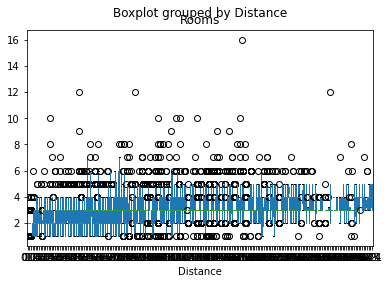

In [ ]:
#using boxplot to show outliers
df.boxplot(column = ['Rooms'], by='Distance', grid = False)

In [ ]:
#Removing outliers found
cols = ['Rooms', 'Bedrooms','Car','Landsize','Price','Distance'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
#describing the dataframe to see changes made from removing outliers
df.describe()


,Rooms,Price,Distance,Postcode,Bedrooms,Bathrooms,Car,Landsize,Latitude,Longitude,PropertyCount
count,29674.000000,2.967400e+04,29674.000000,29674.000000,29674.000000,29674.000000,29674.000000,29674.000000,29674.000000,29674.000000,29674.000000
mean,2.934825,9.012915e+05,10.442977,3100.063962,2.224978,1.153737,1.195255,452.087585,-28.451812,109.121843,7598.112624
std,0.911106,3.217020e+05,5.198738,73.549050,1.514130,0.884010,1.043790,214.680640,16.314151,62.569530,4493.173403
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.031100,0.000000,0.000000
25%,2.000000,6.900000e+05,6.400000,3046.000000,0.000000,0.000000,0.000000,313.000000,-37.841580,144.657410,4380.000000
50%,3.000000,8.700000e+05,10.300000,3084.000000,3.000000,1.000000,1.000000,521.000000,-37.768950,144.959905,6763.000000
75%,3.000000,1.035000e+06,13.800000,3147.000000,3.000000,2.000000,2.000000,552.000000,-37.580627,145.044353,10412.000000
max,7.000000,1.832000e+06,25.200000,3752.000000,6.000000,7.000000,5.000000,959.000000,0.000000,145.305890,21650.000000


In [ ]:
a = df.groupby('RegionName')['Type'].count()
a

RegionName
0                                3
Eastern Metropolitan          3916
Eastern Victoria                 2
Northern Metropolitan         8892
Northern Victoria               32
South-Eastern Metropolitan    1156
Southern Metropolitan         9428
Western Metropolitan          6245
Name: Type, dtype: int64

In [ ]:
df.pivot_table(values=['CouncilArea',], index = ['RegionName','PropertyCount'], aggfunc =np.sum)

CouncilArea
RegionName           PropertyCount                                                   
0                    0                                                              0
Eastern Metropolitan 790            Banyule City CouncilBanyule City CouncilBanyul...
                     915            Banyule City CouncilBanyule City CouncilBanyul...
                     938            Nillumbik Shire CouncilNillumbik Shire Council...
                     1058              Nillumbik Shire CouncilNillumbik Shire Council
...                                                                               ...
Western Metropolitan 10160          Wyndham City CouncilWyndham City CouncilWyndha...
                     13830          Wyndham City CouncilWyndham City CouncilWyndha...
                     14042          Brimbank City CouncilBrimbank City CouncilBrim...
                     15542          Wyndham City CouncilWyndham City CouncilWyndha...
                     16166          Wyndham City CouncilWyndham City CouncilWyndha...

[269 rows x 1 columns]

##DATA ANALYSIS

####Determining the most popular types of houses sold.

In [ ]:
#what is the most popular types of houses sold.
df['Type'].value_counts()

house        19548
unit          6713
townhouse     3413
Name: Type, dtype: int64

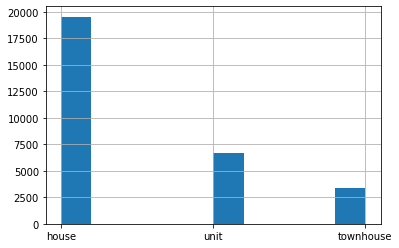

In [ ]:
#a visual representation of most popular types of houses sold using histogram
df.Type.hist()

####Determining the most popular Location among buyers.

In [ ]:
#what is the most popular suburbs among buyers.
df['Suburb'].value_counts().head()

Reservoir         829
Bentleigh East    571
Richmond          498
Preston           473
Brunswick         421
Name: Suburb, dtype: int64

In [ ]:
#what is the least popular suburbs among buyers.
df['Suburb'].value_counts().tail()

croydon        1
viewbank       1
Bulla          1
Plenty         1
Fawkner Lot    1
Name: Suburb, dtype: int64

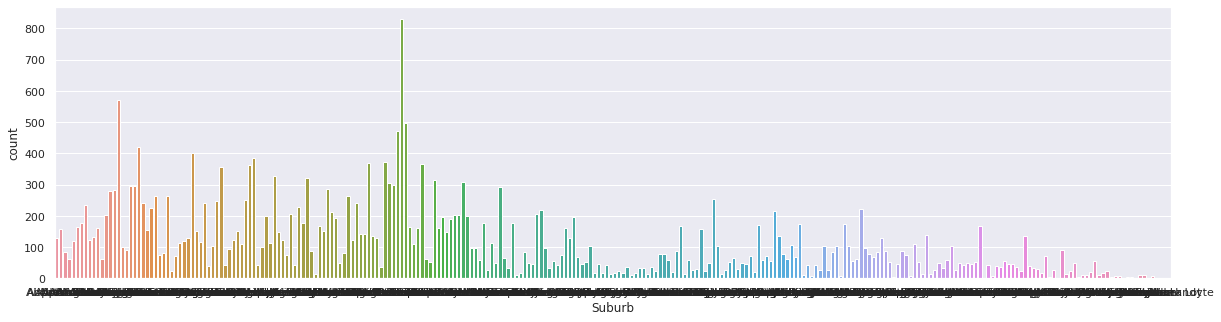

In [ ]:
#a visual representation of suburbs sale distribution using seaborn library
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='Suburb',data=df)

In [ ]:
#what is the most popular Councilarea among buyers.
df['CouncilArea'].value_counts().head()

Darebin City Council       2730
Boroondara City Council    2555
Moreland City Council      2028
Glen Eira City Council     1837
Banyule City Council       1710
Name: CouncilArea, dtype: int64

In [ ]:
#what is the least popular Councilarea among buyers.
df['CouncilArea'].value_counts().tail()

Knox City Council                 327
Greater Dandenong City Council    306
Melton City Council               128
Nillumbik Shire Council            40
0                                   3
Name: CouncilArea, dtype: int64

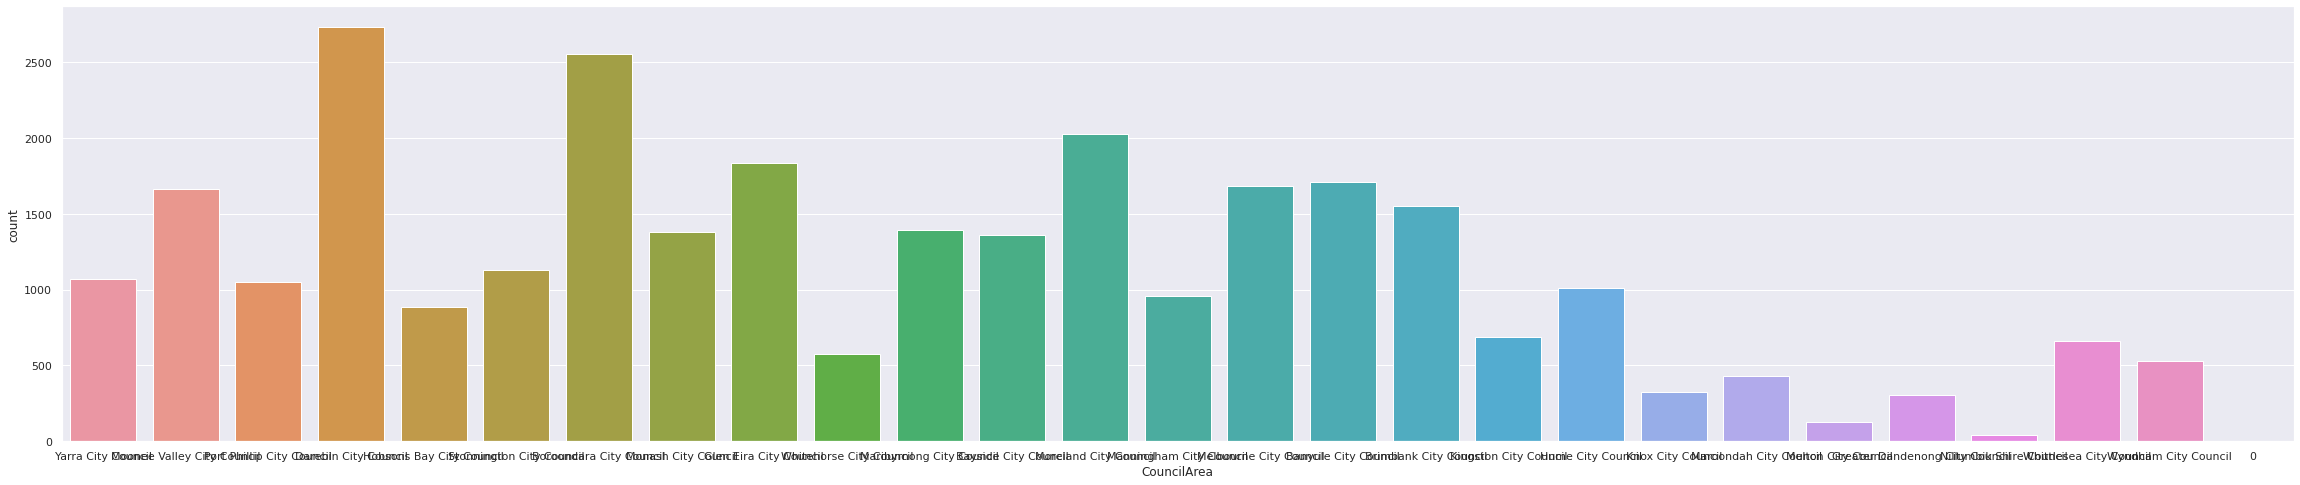

In [ ]:
#a representation of CouncilArea popularity using seaborn Library
sns.set(rc={'figure.figsize':(40,8)})
sns.countplot(x='CouncilArea',data=df)

In [ ]:
#what is the most popular Region among buyers.
df['RegionName'].value_counts().head()

Southern Metropolitan         9428
Northern Metropolitan         8892
Western Metropolitan          6245
Eastern Metropolitan          3916
South-Eastern Metropolitan    1156
Name: RegionName, dtype: int64

In [ ]:
#what is the least popular Region among buyers.
df['RegionName'].value_counts().tail()

Eastern Metropolitan          3916
South-Eastern Metropolitan    1156
Northern Victoria               32
0                                3
Eastern Victoria                 2
Name: RegionName, dtype: int64

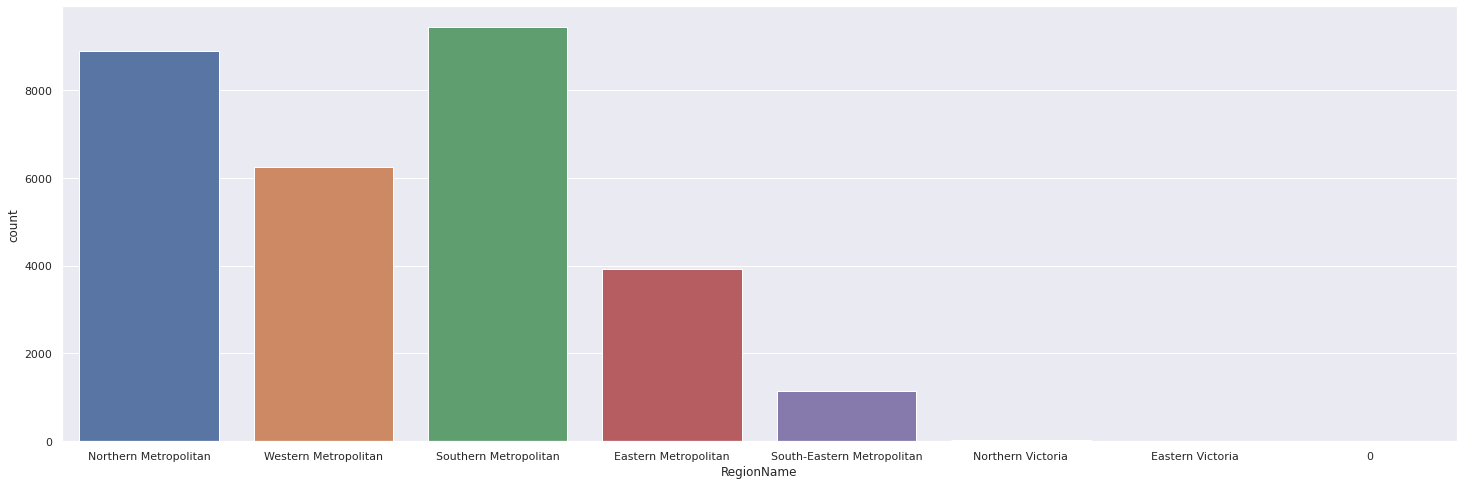

In [ ]:
#region popularity shown using visuals with seaborn Library.
sns.set(rc={'figure.figsize':(25,8)})
sns.countplot(x='RegionName',data=df)

####Analyzing the influence of distance from CBD 

In [ ]:
#creating a table of the property features we want to correlate.
df2 =pd.pivot_table(df, values=['Rooms','Distance','Bedrooms','Bathrooms','Car','Landsize','Price'],index =['Suburb'], aggfunc=np.sum)

In [ ]:
#a correlation of property features.
df2.corr()

,Bathrooms,Bedrooms,Car,Distance,Landsize,Price,Rooms
Bathrooms,1.000000,0.990034,0.964154,0.841187,0.943676,0.968692,0.980292
Bedrooms,0.990034,1.000000,0.981519,0.869778,0.963843,0.956041,0.988546
Car,0.964154,0.981519,1.000000,0.913377,0.979660,0.922926,0.980155
Distance,0.841187,0.869778,0.913377,1.000000,0.926422,0.777582,0.886585
Landsize,0.943676,0.963843,0.979660,0.926422,1.000000,0.925606,0.984608
Price,0.968692,0.956041,0.922926,0.777582,0.925606,1.000000,0.967257
Rooms,0.980292,0.988546,0.980155,0.886585,0.984608,0.967257,1.000000


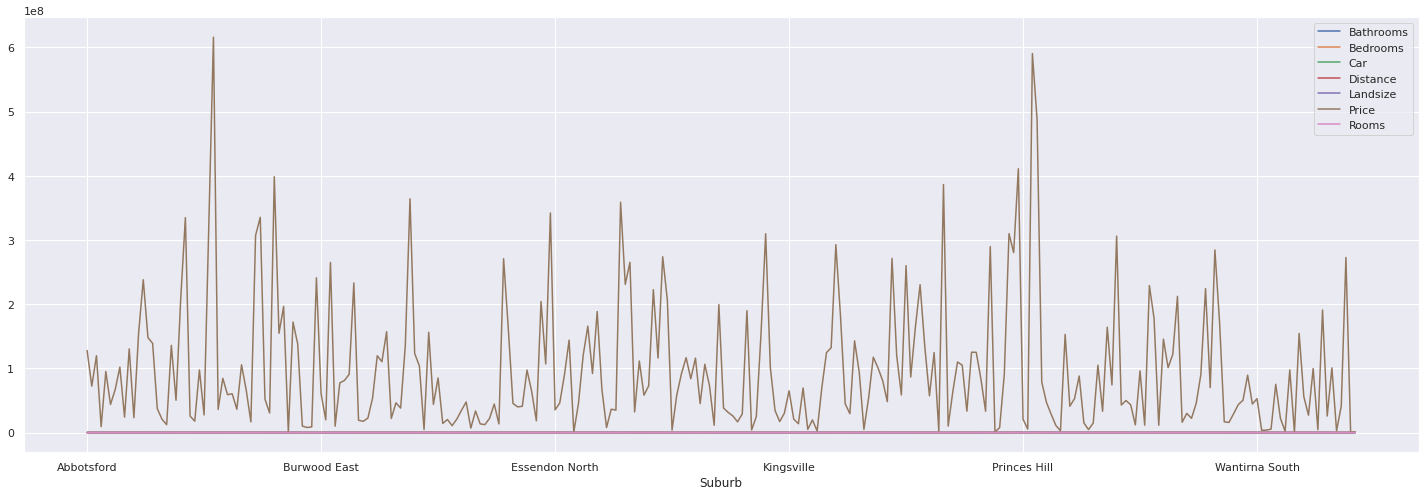

In [ ]:
#line graph representation of the correlation between property features.
df2.plot.line()

####Analysis of Property amenities

In [ ]:
#popularity by number of rooms
df['Rooms'].value_counts()

3    13251
2     7797
4     6048
1     1365
5     1097
6      113
7        3
Name: Rooms, dtype: int64

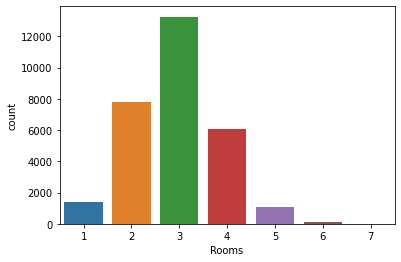

In [ ]:
#graphical representation of popularity by number of rooms using sns
sns.countplot(x='Rooms',data=df)

In [ ]:
#most popular number of bedrooms
df['Bedrooms'].value_counts().head(1)

3    10286
Name: Bedrooms, dtype: int64

In [ ]:
#least popluar number of bedrooms
df['Bedrooms'].value_counts().tail(1)

6    86
Name: Bedrooms, dtype: int64

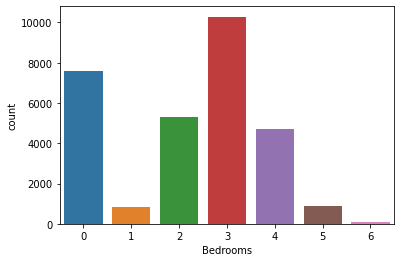

In [ ]:
#graphical representation of popularity by number of bedrooms.
sns.countplot(x='Bedrooms',data=df)

In [ ]:
#most popular number of bathrooms
df['Bathrooms'].value_counts().head(1)

1    11692
Name: Bathrooms, dtype: int64

In [ ]:
#least popular number of bathrooms
df['Bathrooms'].value_counts().tail(3)

5    34
6     4
7     1
Name: Bathrooms, dtype: int64

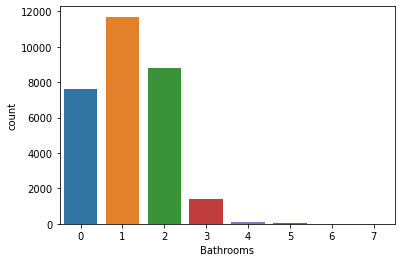

In [ ]:
#visual representation of popularity by number of bathrooms.
sns.countplot(x='Bathrooms',data=df)

In [ ]:
#least popular car parking space
df['Car'].value_counts().tail(3)

3    1229
4     830
5     109
Name: Car, dtype: int64

In [ ]:
#most popular car parking space
df['Car'].value_counts().head(3)

2    9870
0    9460
1    8176
Name: Car, dtype: int64

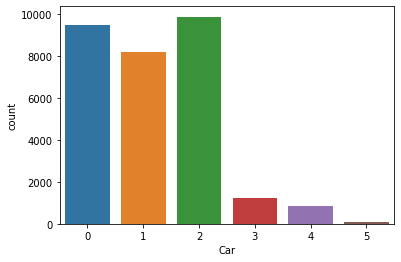

In [ ]:
#graphical representation of popularity by number of parking spaces using seaborn Library.
sns.countplot(x='Car',data=df)

####Analysis by Method of sale and sales agent

In [ ]:
#Who were the top selling AGents?
df['Agent'].value_counts().head()

Nelson           3001
Barry            2976
Jellis           2751
hockingstuart    2218
Ray              1718
Name: Agent, dtype: int64

In [ ]:
#Who were the worst selling AGents?
df['Agent'].value_counts().tail()

Jim                    1
Naison                 1
Reed                   1
Sutherland             1
hockingstuart/Barry    1
Name: Agent, dtype: int64

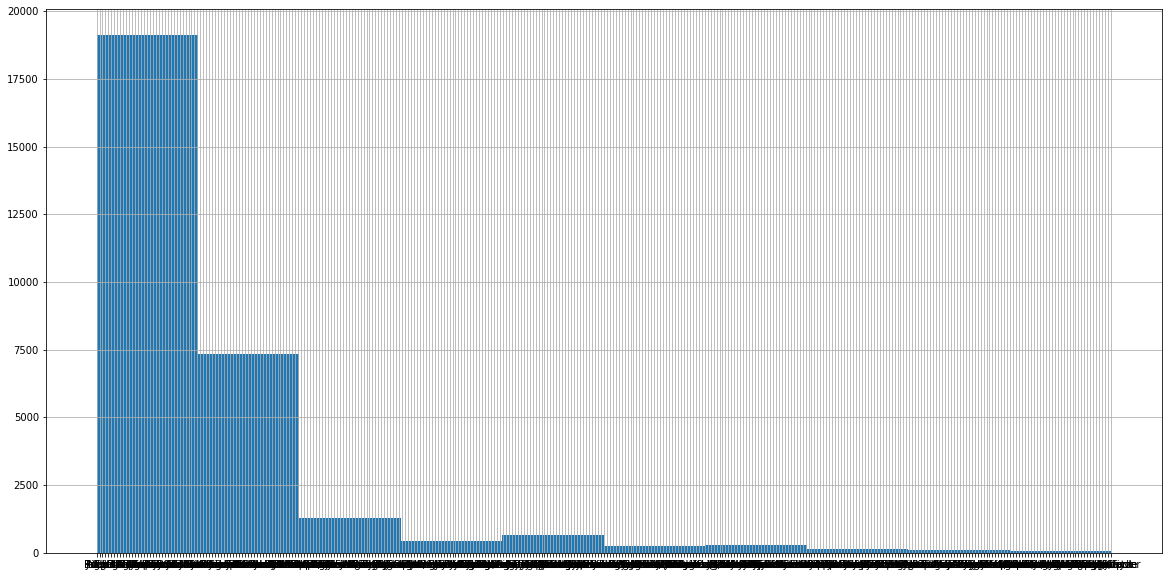

In [ ]:
#Agent performance representation using a histogram.
df.Agent.hist()


In [ ]:
#Most popular method of sale.
df.groupby('Method')['Suburb'].count().sort_values(ascending = False)

Method
S     16845
SP     4460
PI     4077
VB     2465
SN     1217
PN      264
SA      184
W       131
SS       31
Name: Suburb, dtype: int64

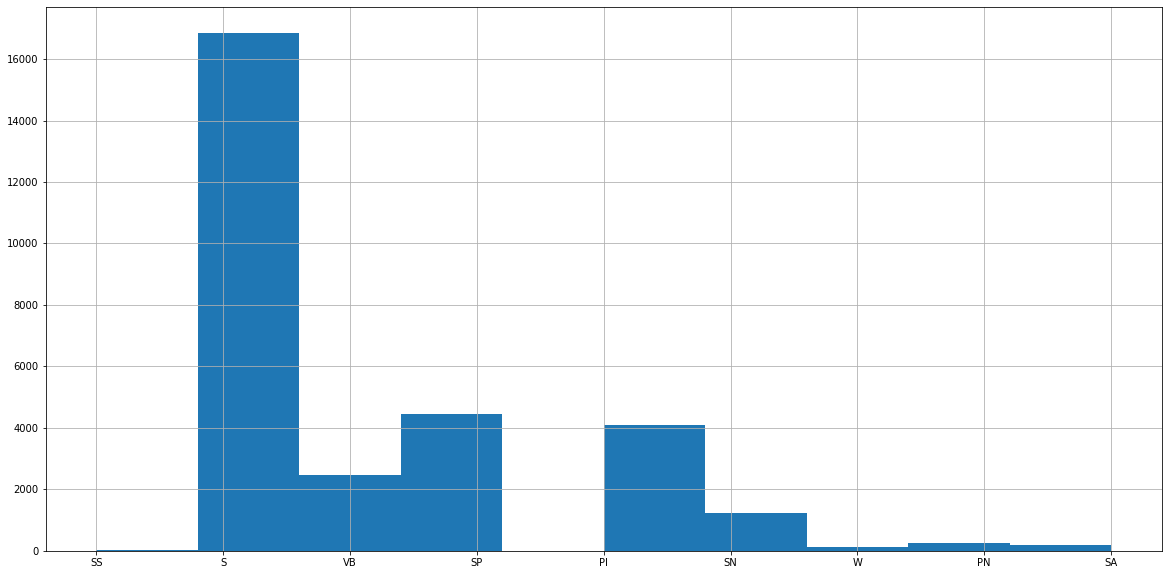

In [ ]:
#visual representation of sale Method using histogram
df.Method.hist(figsize=[20,10])

####Timeframe Analysis

In [ ]:
#count of property sold  per year
df.groupby(df['Date'].dt.strftime('%Y'))['Type'].count().sort_values(ascending = False)

Date
2017    16582
2016     9160
2018     3932
Name: Type, dtype: int64

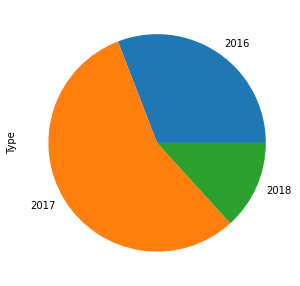

In [ ]:
#visual representation of count of property sold  per year
df.groupby(df['Date'].dt.strftime('%Y'))['Type'].count().plot(kind='pie',y='Type',figsize=[5,5])

In [ ]:
#count of property sold per month
df.groupby(df['Date'].dt.strftime('%B'))['Type'].count().sort_values(ascending = False)

Date
March        3758
October      3665
September    3237
November     3153
July         2904
August       2886
June         2828
May          2381
April        1849
February     1687
December      916
January       410
Name: Type, dtype: int64

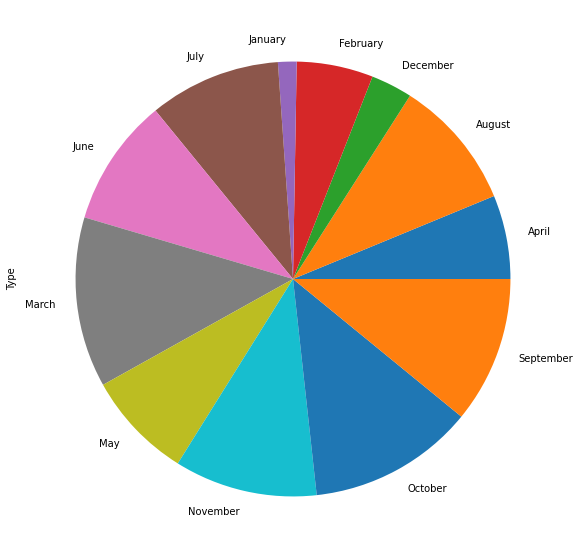

In [ ]:
#a visual representation of count of property sold  per month
df.groupby(df['Date'].dt.strftime('%B'))['Type'].count().plot(kind='pie',y='Type',figsize=[10,10])

####Analysis by sales

In [ ]:
#The dates that recorded the highest number of sales
date = pd.pivot_table(df, values=['Method'],index =['Date'], aggfunc='count')
date.sort_values(by= 'Method',ascending = False).head()

,Method
Date,
2017-10-28,901
2018-03-17,800
2018-02-24,783
2017-09-12,779
2017-11-25,758


In [ ]:
#pivot table for price and Date.
price=pd.pivot_table(df, index=['Date'], values=['Price'], aggfunc=np.sum)
price.head()

,Price
Date,
2016-01-28,2888000.0
2016-03-09,272168000.0
2016-03-12,367162087.0
2016-04-02,37943750.0
2016-04-06,285206750.0


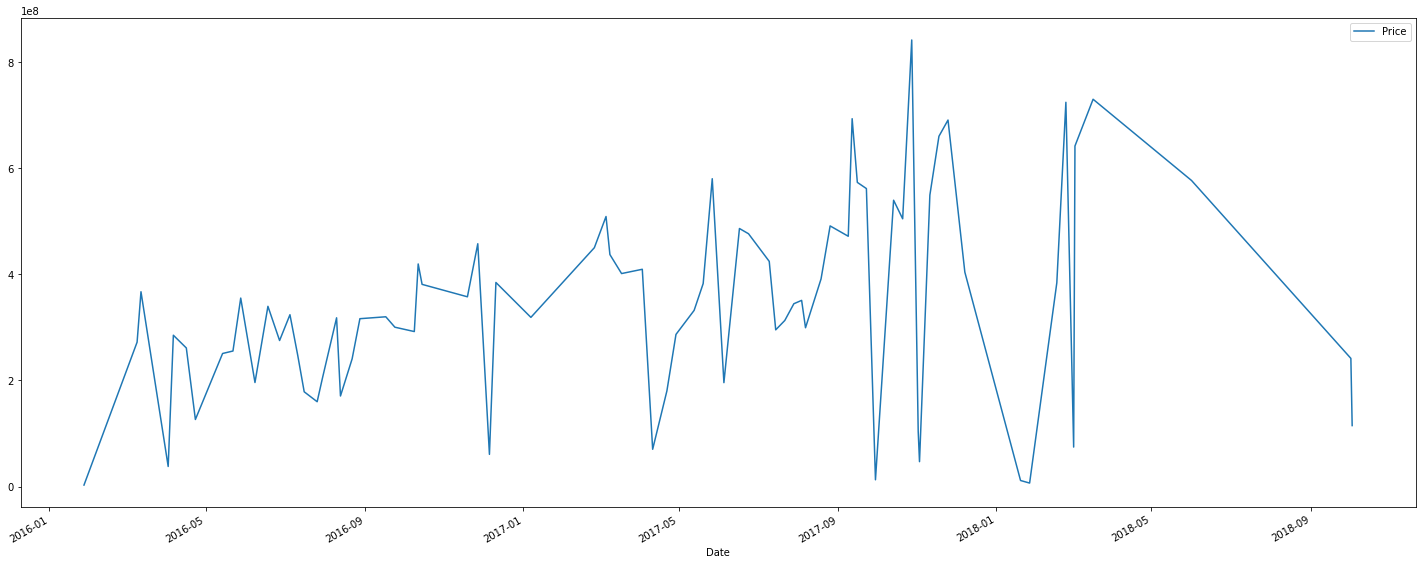

In [ ]:
#graphical representation of changes in price over time.
price.plot.line(figsize=[25,10])

In [ ]:
#pivot table for price and suburb
price1=pd.pivot_table(df, index=['Suburb'], values=['Price'], aggfunc=np.sum)
price1.head()

,Price
Suburb,
Abbotsford,127881000.0
Aberfeldie,72368500.0
Airport West,119706001.0
Albanvale,9174500.0
Albert Park,95104500.0


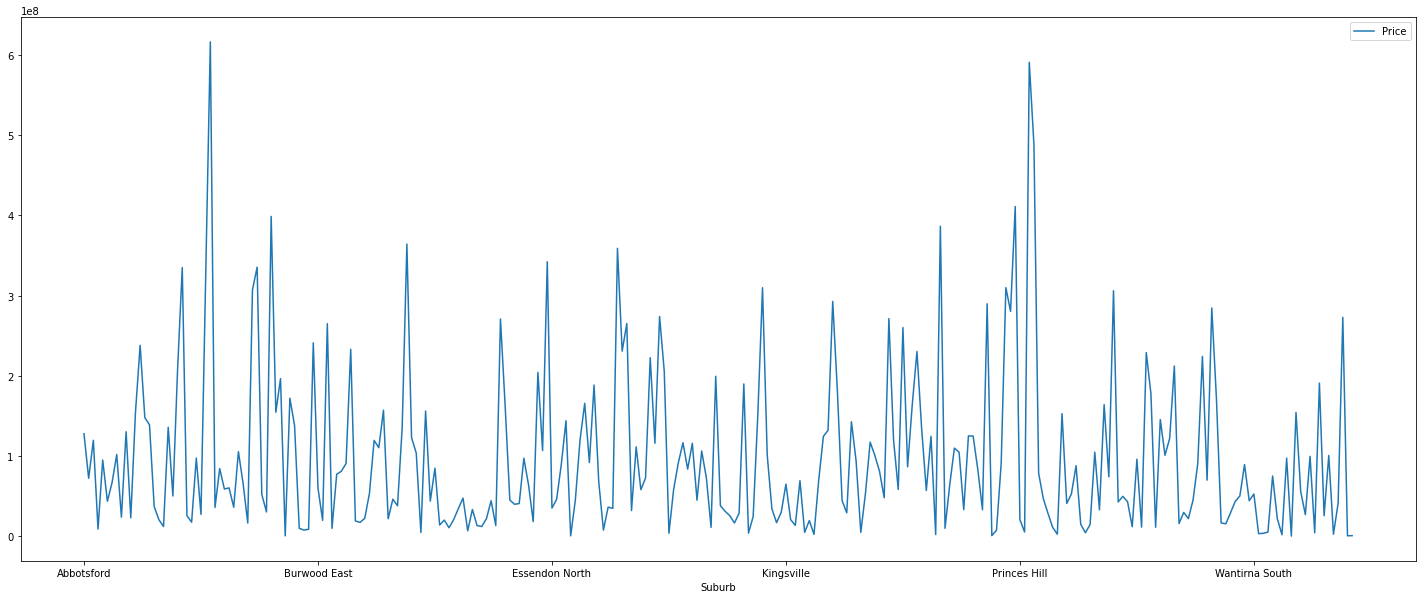

In [ ]:
#a linear graph showing the distribution of price across suburbs.
price1.plot.line(figsize=[25,10])

In [ ]:
#sales value per month
df.groupby(df['Date'].dt.strftime('%B'))['Price'].sum().sort_values(ascending = False)

Date
March        3.433012e+09
October      3.335039e+09
September    2.932910e+09
November     2.866093e+09
August       2.578747e+09
June         2.546486e+09
July         2.490743e+09
May          2.156258e+09
April        1.657848e+09
February     1.558413e+09
December     8.494252e+08
January      3.399507e+08
Name: Price, dtype: float64

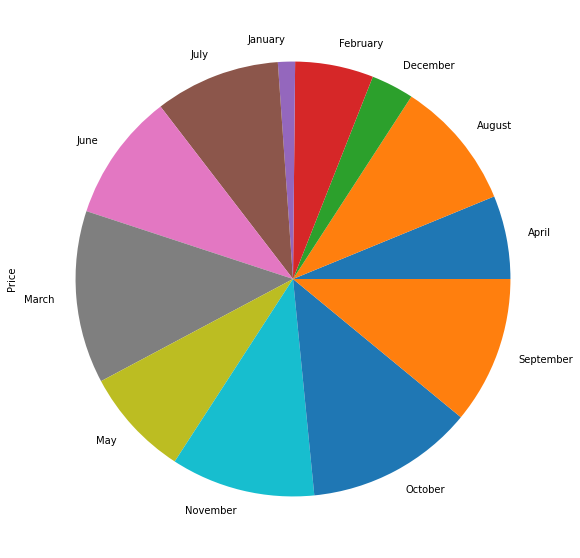

In [ ]:
#pie chart of sales value per month.
df.groupby(df['Date'].dt.strftime('%B'))['Price'].sum().plot(kind='pie',y='Type',figsize=[10,10])

In [ ]:
#what is the most expensive Region by price among buyers.
df.groupby(['RegionName'])['Price'].sum()

RegionName
0                             2.151000e+06
Eastern Metropolitan          3.868980e+09
Eastern Victoria              2.715000e+06
Northern Metropolitan         7.363783e+09
Northern Victoria             2.497350e+07
South-Eastern Metropolitan    1.037463e+09
Southern Metropolitan         9.301252e+09
Western Metropolitan          5.143607e+09
Name: Price, dtype: float64

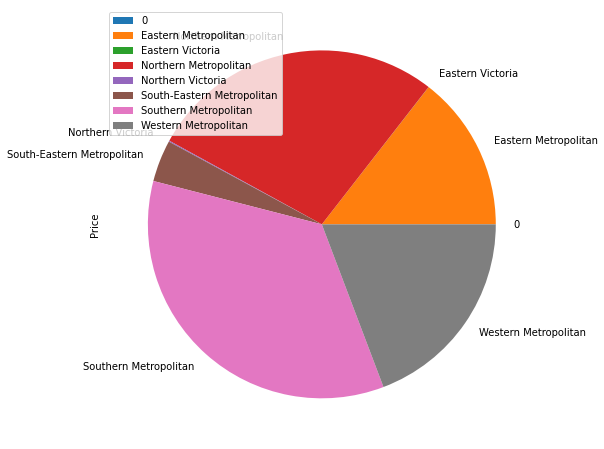

In [ ]:
#a pie chart of RegionName by price.
df.groupby(['RegionName']).sum().plot(kind='pie',y='Price',figsize=[8,8])

####OTHER

In [ ]:
#df.plot.bar(x="Price", y="Distance", rot=70);
#plot.show(block=True);

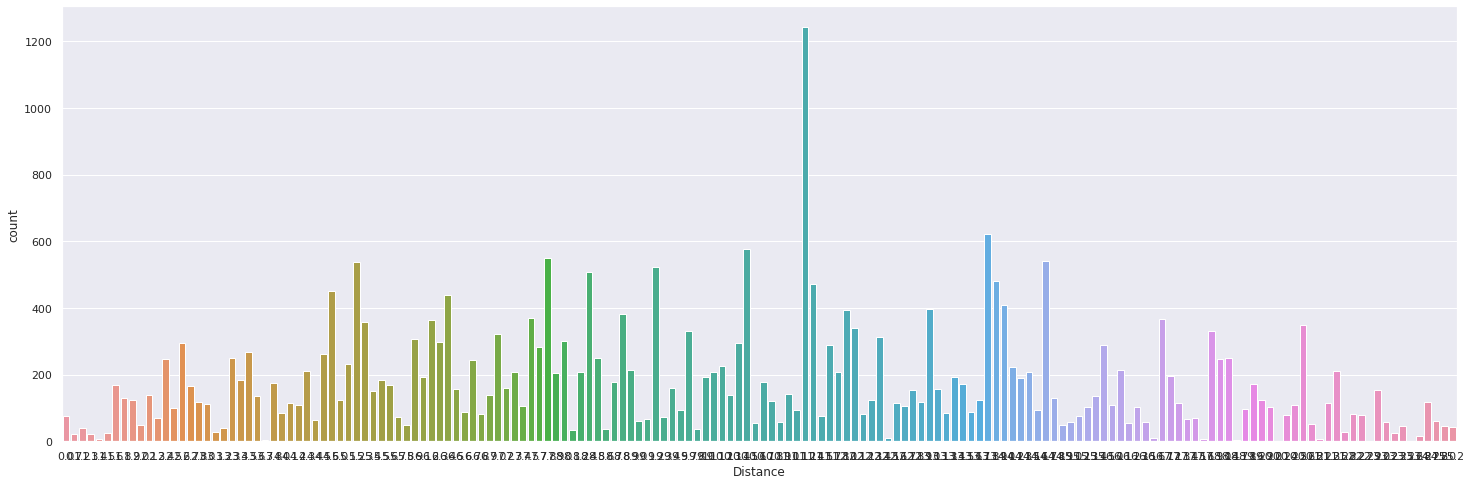

In [ ]:
# visual representation of 
sns.set(rc={'figure.figsize':(25,8)})
chart = sns.countplot(x='Distance',data=df)


In [ ]:
df.plot.pie(y='Suburb',figsize=[5,5],subplots=True)

In [ ]:
df.groupby(['Type']).sum().plot(kind='pie',y='Price')

In [ ]:
df.groupby(['CouncilArea']).sum().plot(figsize=[15,15],shadow=True,startangle=90,kind='pie',y='Price')

In [ ]:
#df.groupby(['Type']).sum().plot(kind='pie', subplots=True, shadow = True,figsize=(15,10))

In [ ]:
#df['Price'].plot(kind='bar')

In [ ]:
df.groupby(['RegionName']).sum().plot(figsize=[10,10],kind='pie',y='Price')

In [ ]:
sns.countplot(x='Rooms',data=df)